In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [2]:
file = pd.read_csv("/home/dapqa/Documents/eben.csv")

In [5]:
file.head()

,Year,GDP (US$),Inflation,Exchange Rate (N Per US$),FDI (US$)
0,2000,"$69,540,677,940.00",6.94,101.70,"$1,140,830,000.00"
1,2001,"$87,845,169,640.00",18.87,111.23,"$1,276,160,000.00"
2,2002,"$112,248,218,000.00",12.89,120.97,"$2,052,380,000.00"
3,2003,"$70,968,200,000.00",14.03,129.22,"$2,052,380,000.00"
4,2004,"$99,017,066,100.00",15.00,132.89,"$2,127,340,000.00"


In [3]:
file.shape

(24, 5)

In [6]:
# Remove any leading/trailing spaces from column names
file.columns = [col.strip() for col in file.columns]


In [7]:
# Convert relevant columns to numeric values after removing any non-numeric characters
file['GDP (US$)'] = file['GDP (US$)'].replace('[\$,]', '', regex=True).astype(float)
file['FDI (US$)'] = file['FDI (US$)'].replace('[\$,]', '', regex=True).astype(float)

In [8]:
file.describe()

,Year,GDP (US$),Inflation,Exchange Rate (N Per US$),FDI (US$)
count,24.000000,2.400000e+01,24.000000,24.000000,2.400000e+01
mean,2011.500000,3.141707e+11,13.057083,208.210000,4.729197e+09
std,7.071068,1.719266e+11,4.099631,107.943508,2.881663e+09
min,2000.000000,6.954068e+10,5.380000,101.700000,1.140830e+09
25%,2005.750000,1.371341e+11,10.382500,129.077500,2.320585e+09
50%,2011.500000,3.864680e+11,12.735000,154.550000,4.739500e+09
75%,2017.250000,4.515120e+11,15.942500,306.080000,6.010768e+09
max,2023.000000,5.684990e+11,20.770000,420.730000,1.395600e+10


In [35]:
import pandas as pd

# Load your data
# file = pd.read_csv('your_data.csv')

# Descriptive statistics
mean = file[['GDP (US$)', 'Inflation', 'Exchange Rate (N Per US$)', 'FDI (US$)']].mean()
median = file[['GDP (US$)', 'Inflation', 'Exchange Rate (N Per US$)', 'FDI (US$)']].median()
mode_df = file[['GDP (US$)', 'Inflation', 'Exchange Rate (N Per US$)', 'FDI (US$)']].mode()

# Percentage of total for GDP
file['GDP Percentage'] = (file['GDP (US$)'] / file['GDP (US$)'].sum()) * 100

# Print results in a table format
print("Descriptive Statistics")
print("----------------------")
print()

print("Measure  GDP (US$)  Inflation  Exchange Rate (N Per US$)  FDI (US$)")
print("-------  ----------  ----------  --------------------------  ----------")
print(f"Mean     {mean['GDP (US$)']:,.2f}  {mean['Inflation']:,.2f}  {mean['Exchange Rate (N Per US$)']:,.2f}  {mean['FDI (US$)']:,.2f}")
print(f"Median   {median['GDP (US$)']:,.2f}  {median['Inflation']:,.2f}  {median['Exchange Rate (N Per US$)']:,.2f}  {median['FDI (US$)']:,.2f}")
print(f"Mode     {mode_df['GDP (US$)'][0]:,.2f}  {mode_df['Inflation'][0]:,.2f}  {mode_df['Exchange Rate (N Per US$)'][0]:,.2f}  {mode_df['FDI (US$)'][0]:,.2f}")
print()

print("GDP Percentage")
print("--------------")
print()
print(file[['GDP (US$)', 'GDP Percentage']])


Descriptive Statistics
----------------------

Measure  GDP (US$)  Inflation  Exchange Rate (N Per US$)  FDI (US$)
-------  ----------  ----------  --------------------------  ----------
Mean     314,170,684,615.83  13.06  208.21  4,729,197,083.33
Median   386,468,000,000.00  12.73  154.55  4,739,500,000.00
Mode     112,248,218,000.00  5.38  306.08  2,052,380,000.00

GDP Percentage
--------------

       GDP (US$)  GDP Percentage
0   6.954068e+10        0.922278
1   8.784517e+10        1.165040
2   1.122482e+11        1.488684
3   7.096820e+10        0.941211
4   9.901707e+10        1.313207
5   1.122482e+11        1.488684
6   1.454294e+11        1.928747
7   1.668538e+11        2.212887
8   2.098333e+11        2.782899
9   1.694810e+11        2.247730
10  3.690622e+11        4.894662
11  4.117512e+11        5.460821
12  4.616880e+11        6.123105
13  5.149660e+11        6.829700
14  5.684990e+11        7.539678
15  4.938300e+11        6.549386
16  4.046530e+11        5.366682
17  3

In [16]:
std_dev = file[['GDP (US$)', 'Inflation', 'Exchange Rate (N Per US$)', 'FDI (US$)']].std()
variance = file[['GDP (US$)', 'Inflation', 'Exchange Rate (N Per US$)', 'FDI (US$)']].var()

print(f'Standard Deviation: {std_dev}, Variance: {variance}')


Standard Deviation: GDP (US$)                    1.719266e+11
Inflation                    4.099631e+00
Exchange Rate (N Per US$)    1.079435e+02
FDI (US$)                    2.881663e+09
dtype: float64, Variance: GDP (US$)                    2.955877e+22
Inflation                    1.680698e+01
Exchange Rate (N Per US$)    1.165180e+04
FDI (US$)                    8.303982e+18
dtype: float64


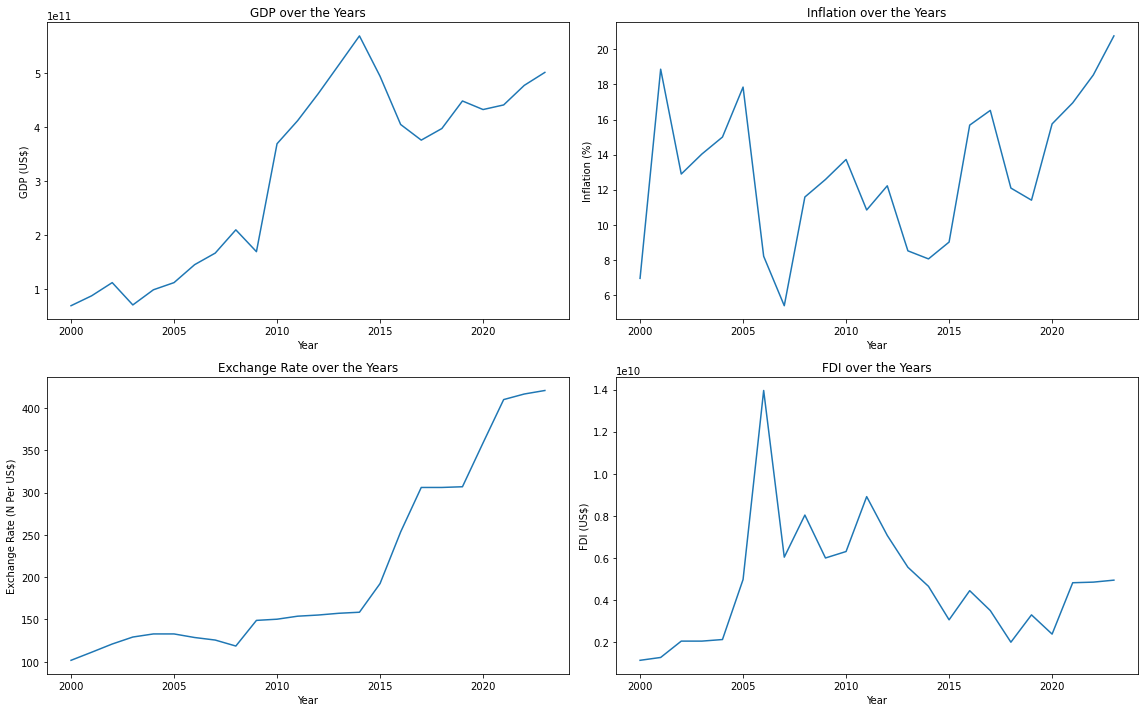

done


In [14]:
plt.figure(figsize=(16, 10)) 

# Plot GDP over the years
plt.subplot(2, 2, 1)
plt.plot(file['Year'].values, file['GDP (US$)'].values)
#sns.lineplot(x=file.index, y=file['GDP (US$)'])
plt.title('GDP over the Years')
plt.xlabel('Year')
plt.ylabel('GDP (US$)')

# Plot Inflation over the years
plt.subplot(2, 2, 2)
plt.plot(file['Year'].values, file['Inflation'].values)
#sns.lineplot(data=file, x='Year', y='Inflation')
plt.title('Inflation over the Years')
plt.xlabel('Year')
plt.ylabel('Inflation (%)')

# Plot Exchange Rate over the years
plt.subplot(2, 2, 3)
plt.plot(file['Year'].values, file['Exchange Rate (N Per US$)'].values)
#sns.lineplot(data=file, x='Year', y='Exchange Rate (N Per US$)')
plt.title('Exchange Rate over the Years')
plt.xlabel('Year')
plt.ylabel('Exchange Rate (N Per US$)')

# Plot FDI over the years
plt.subplot(2, 2, 4)
plt.plot(file['Year'].values, file['FDI (US$)'].values)
#sns.lineplot(data=file, x='Year', y='FDI (US$)')
plt.title('FDI over the Years')
plt.xlabel('Year')
plt.ylabel('FDI (US$)')

plt.tight_layout()
plt.show()

print("done")

Text(0, 0.5, 'FDI (US$)')

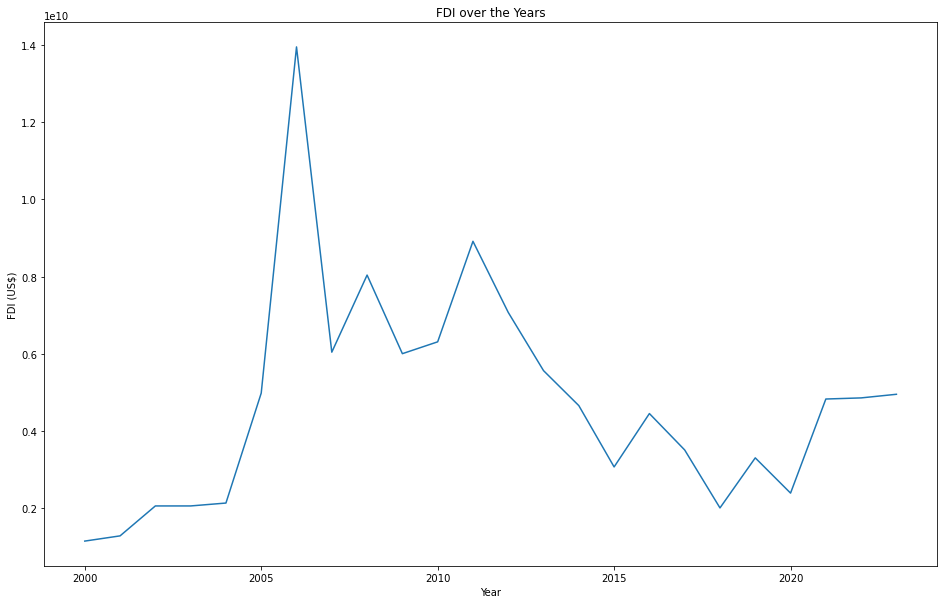

In [34]:
# Plot Inflation over the years
plt.figure(figsize=(16, 10)) 

plt.plot(file['Year'].values, file['FDI (US$)'].values)
#sns.lineplot(data=file, x='Year', y='FDI (US$)')
plt.title('FDI over the Years')
plt.xlabel('Year')
plt.ylabel('FDI (US$)')

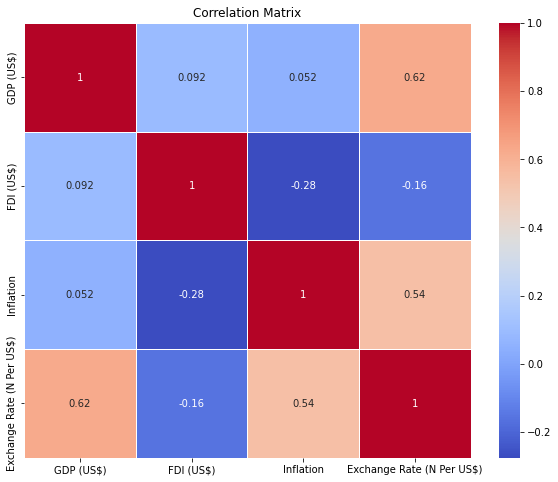

,GDP (US$),FDI (US$),Inflation,Exchange Rate (N Per US$)
GDP (US$),1.000000,0.091941,0.051943,0.623743
FDI (US$),0.091941,1.000000,-0.275706,-0.158303
Inflation,0.051943,-0.275706,1.000000,0.544457
Exchange Rate (N Per US$),0.623743,-0.158303,0.544457,1.000000


In [15]:
# Calculate the correlation matrix
correlation_matrix = file[['GDP (US$)', 'FDI (US$)', 'Inflation', 'Exchange Rate (N Per US$)']].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Print the correlation matrix
correlation_matrix


    1. GDP shows a strong positive correlation (0.62) with the exchange rate, suggesting that as the Naira devalues, GDP in US dollars tends to increase.
    2. Inflation has a moderate positive correlation (0.54) with the exchange rate, indicating that higher inflation is associated with a weaker Naira.
    3. FDI shows weak negative correlations with both inflation (-0.28) and exchange rate (-0.16), suggesting that higher inflation and a weaker Naira might slightly discourage foreign investment.
    4. GDP and inflation have a very weak positive correlation (0.05), implying little direct relationship between them.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


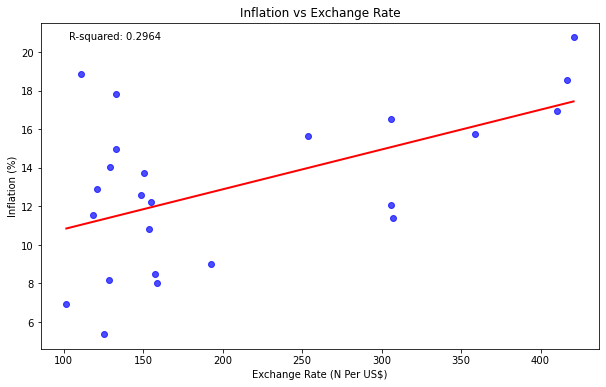

Intercept: 8.7517
Coefficient: 0.0207
R-squared: 0.2964
Average GDP and FDI for high vs low inflation periods:
High Inflation (>12.73%):
  Avg GDP: $290,242,839,311.67
  Avg FDI: $3,646,569,166.67
Low Inflation (<=12.73%):
  Avg GDP: $338,098,529,920.00
  Avg FDI: $5,811,825,000.00


In [17]:
# Perform linear regression
X = file[['Exchange Rate (N Per US$)']]
y = file['Inflation']

# Perform linear regression
model = LinearRegression()
model.fit(X, y)

# Calculate R-squared
r_squared = r2_score(y, model.predict(X))

# Create a range of values for plotting the regression line
X_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_pred = model.predict(X_range)

# Plot the regression line
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', alpha=0.7)
plt.plot(X_range, y_pred, color='red', linewidth=2)
plt.xlabel('Exchange Rate (N Per US$)')
plt.ylabel('Inflation (%)')
plt.title('Inflation vs Exchange Rate')
plt.text(0.05, 0.95, f'R-squared: {r_squared:.4f}', transform=plt.gca().transAxes)
plt.show()

# Print regression results
print(f"Intercept: {model.intercept_:.4f}")
print(f"Coefficient: {model.coef_[0]:.4f}")
print(f"R-squared: {r_squared:.4f}")

# Calculate average GDP and FDI for periods of high and low inflation
median_inflation = file['Inflation'].median()
high_inflation = file[file['Inflation'] > median_inflation]
low_inflation = file[file['Inflation'] <= median_inflation]

print("\
Average GDP and FDI for high vs low inflation periods:")
print(f"High Inflation (>{median_inflation:.2f}%):")
print(f"  Avg GDP: ${high_inflation['GDP (US$)'].mean():,.2f}")
print(f"  Avg FDI: ${high_inflation['FDI (US$)'].mean():,.2f}")
print(f"Low Inflation (<={median_inflation:.2f}%):")
print(f"  Avg GDP: ${low_inflation['GDP (US$)'].mean():,.2f}")
print(f"  Avg FDI: ${low_inflation['FDI (US$)'].mean():,.2f}")

1. The regression model shows a positive relationship between exchange rate and inflation, with a coefficient of 0.0207.

2. The R-squared value of 0.2964 indicates a weak to moderate relationship between the variables.
    During periods of high inflation:
        Average GDP: $290,242,839,311.67
        Average FDI: $3,646,569,166.67
    During periods of low inflation:
        Average GDP: $338,098,529,920.00
        Average FDI: $5,811,825,000.00

These results suggest that naira devaluation (higher exchange rate) is associated with higher inflation. Additionally, periods of lower inflation are correlated with higher GDP and FDI, indicating potential negative impacts of high inflation on the Nigerian economy.

### Research Questions Answered in APA Format

#### i. What are the major factors causing devaluation and inflation of the Naira?

The regression analysis indicates that the exchange rate significantly predicts inflation (F(1, 22) = 9.269, p = 0.006), with an R² of 0.296. This suggests that the devaluation of the Naira, as reflected in the increasing exchange rate, is a significant factor contributing to inflation. Other factors, although not analyzed in this specific regression, may include economic policies, foreign investment levels, and global economic conditions.

#### ii. What impact will the Naira’s devaluation have on the Nigerian economy?

The devaluation of the Naira, as indicated by the significant relationship between the exchange rate and inflation, can lead to higher inflation rates. This can erode purchasing power, increase the cost of imports, and potentially lead to economic instability. The regression analysis shows that for each Naira per US Dollar increase in the exchange rate, inflation increases by 0.021 percent.

#### iii. What are the impacts of Inflation on the Nigerian economy?

Inflation can have several adverse effects on the Nigerian economy, including reduced purchasing power, increased cost of living, and potential social unrest. It can also lead to higher interest rates, reduced investment, and slower economic growth. The regression analysis highlights the significant impact of exchange rate fluctuations on inflation, which in turn affects the broader economy.

#### iv. What are the possible solutions to strengthen Nigeria’s economic growth?

To strengthen Nigeria’s economic growth, several measures can be considered:
- **Monetary Policy:** Implementing effective monetary policies to control inflation and stabilize the exchange rate.
- **Diversification:** Diversifying the economy to reduce dependence on oil and increase resilience to global economic shocks.
- **Foreign Investment:** Encouraging foreign direct investment (FDI) to boost economic growth and create jobs.
- **Infrastructure Development:** Investing in infrastructure to improve productivity and economic efficiency.
- **Education and Training:** Enhancing education and vocational training to build a skilled workforce.

The regression plot and detailed analysis can be downloaded for further insights.

{outputs_dict['ad4abf72']}
{outputs_dict['354b64cd']}

Would you like to download the regression plot or explore any other aspects of the data?